# Handwritten Character Detection using CNN 

### Importing Libraries 

In [1]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
import pickle
import random

Instructions for updating:
non-resource variables are not supported in the long term


### Creating Training Dataset from Directory

In [2]:
DATADIR = "C:/Users/djakkula/Documents/handwrittenrecognition/handwrittenrecognition/alphabets_dataset"

CATEGORIES = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N", "O", "P", "Q", "R", "S", "T", "U", "V", "W", "X", "Y", "Z"]

training_data = []
IMG_SIZE=24

def create_training_data():
    for category in CATEGORIES:  
        i=0
        path = os.path.join(DATADIR,category)  
        class_num = CATEGORIES.index(category)  

        for img in tqdm(os.listdir(path)):  
                if i<=1000:
                    img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)
                    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  
                    training_data.append([new_array, class_num])
                    i+=1
                else:
                    break

create_training_data()

print(len(training_data))


 17%|████████████▋                                                               | 1001/5976 [00:00<00:03, 1323.49it/s]

26026


### Shuffling and Reshaping Data

In [3]:
random.shuffle(training_data)
X = []
y = []
IMG_SIZE=24

for features,label in training_data:
    X.append(features)
    y.append(label)
X = np.array(X).reshape(-1,IMG_SIZE,IMG_SIZE,1)

### Defining the CNN and training the CNN

In [21]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), padding='same', activation='relu', input_shape=(24, 24, 1)))
model.add(MaxPooling2D(strides=2))
model.add(Conv2D(filters=48, kernel_size=(5,5), padding='same', activation='relu'))
model.add(MaxPooling2D(strides=2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(26, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(X, y, batch_size=32, epochs=6, validation_split=0.3)

model.save("Modelz.m")

Train on 18218 samples, validate on 7808 samples
Epoch 1/6
18218/18218 [==============================] - 26s 1ms/sample - loss: 0.8739 - acc: 0.7906 - val_loss: 0.2396 - val_acc: 0.9278
Epoch 2/6
18218/18218 [==============================] - 28s 2ms/sample - loss: 0.1900 - acc: 0.9427 - val_loss: 0.1691 - val_acc: 0.9475
Epoch 3/6
18218/18218 [==============================] - 27s 1ms/sample - loss: 0.1351 - acc: 0.9565 - val_loss: 0.1701 - val_acc: 0.9494
Epoch 4/6
18218/18218 [==============================] - 26s 1ms/sample - loss: 0.1171 - acc: 0.9642 - val_loss: 0.1700 - val_acc: 0.9521
Epoch 5/6
18218/18218 [==============================] - 26s 1ms/sample - loss: 0.0973 - acc: 0.9693 - val_loss: 0.2001 - val_acc: 0.9416
Epoch 6/6
18218/18218 [==============================] - 27s 1ms/sample - loss: 0.0840 - acc: 0.9733 - val_loss: 0.1498 - val_acc: 0.9597


### Testing

Detected Letter is: K


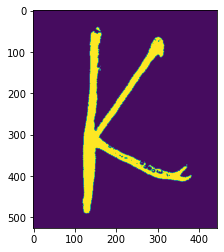

In [22]:
img = cv2.imread("C:/Users/djakkula/Documents/handwrittenrecognition/handwrittenrecognition/test/test.jpg")
imgray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
ret,thresh = cv2.threshold(imgray,150,200,0)
thresh = cv2.bitwise_not(thresh)
cv2.imwrite("C:/Users/djakkula/Documents/handwrittenrecognition/handwrittenrecognition/test/testk.jpg",thresh)
test_img_array = cv2.imread("C:/Users/djakkula/Documents/handwrittenrecognition/handwrittenrecognition/test/testk.jpg",cv2.IMREAD_GRAYSCALE)
test_new_array = cv2.resize(test_img_array, (IMG_SIZE, IMG_SIZE))
test_new_array = np.array(test_new_array).reshape(-1,IMG_SIZE,IMG_SIZE,1)
prediction = model.predict([test_new_array])
prediction = np.argmax(prediction, axis=1)
A="ABCDEFGHIJKLMNOPQRSTUVWXYZ"
print("Detected Letter is:",A[prediction[0]])
plt.imshow(test_img_array)
plt.show()

Detected Letter is: X


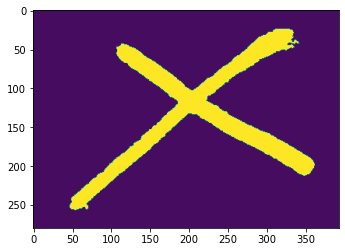

In [23]:
img = cv2.imread("C:/Users/djakkula/Documents/handwrittenrecognition/handwrittenrecognition/test/test1.jpg")
imgray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
ret,thresh = cv2.threshold(imgray,150,200,0)
thresh = cv2.bitwise_not(thresh)
cv2.imwrite("C:/Users/djakkula/Documents/handwrittenrecognition/handwrittenrecognition/test/testk.jpg",thresh)
test_img_array = cv2.imread("C:/Users/djakkula/Documents/handwrittenrecognition/handwrittenrecognition/test/testk.jpg",cv2.IMREAD_GRAYSCALE)
test_new_array = cv2.resize(test_img_array, (IMG_SIZE, IMG_SIZE))
test_new_array = np.array(test_new_array).reshape(-1,IMG_SIZE,IMG_SIZE,1)
prediction = model.predict([test_new_array])
prediction = np.argmax(prediction, axis=1)
A="ABCDEFGHIJKLMNOPQRSTUVWXYZ"
print("Detected Letter is:",A[prediction[0]])
plt.imshow(test_img_array)
plt.show()

Detected Letter is: I


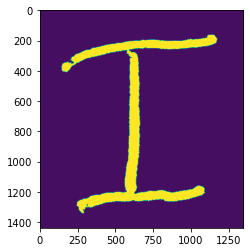

In [24]:
img = cv2.imread("C:/Users/djakkula/Documents/handwrittenrecognition/handwrittenrecognition/test/test2.jpg")
imgray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
ret,thresh = cv2.threshold(imgray,150,200,0)
thresh = cv2.bitwise_not(thresh)
cv2.imwrite("C:/Users/djakkula/Documents/handwrittenrecognition/handwrittenrecognition/test/testk.jpg",thresh)
test_img_array = cv2.imread("C:/Users/djakkula/Documents/handwrittenrecognition/handwrittenrecognition/test/testk.jpg",cv2.IMREAD_GRAYSCALE)
test_new_array = cv2.resize(test_img_array, (IMG_SIZE, IMG_SIZE))
test_new_array = np.array(test_new_array).reshape(-1,IMG_SIZE,IMG_SIZE,1)
prediction = model.predict([test_new_array])
prediction = np.argmax(prediction, axis=1)
A="ABCDEFGHIJKLMNOPQRSTUVWXYZ"
print("Detected Letter is:",A[prediction[0]])
plt.imshow(test_img_array)
plt.show()

Detected Letter is: H


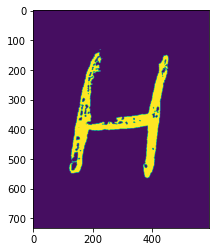

In [25]:
img = cv2.imread("C:/Users/djakkula/Documents/handwrittenrecognition/handwrittenrecognition/test/test3.jpg")
imgray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
ret,thresh = cv2.threshold(imgray,150,200,0)
thresh = cv2.bitwise_not(thresh)
cv2.imwrite("C:/Users/djakkula/Documents/handwrittenrecognition/handwrittenrecognition/test/testk.jpg",thresh)
test_img_array = cv2.imread("C:/Users/djakkula/Documents/handwrittenrecognition/handwrittenrecognition/test/testk.jpg",cv2.IMREAD_GRAYSCALE)
test_new_array = cv2.resize(test_img_array, (IMG_SIZE, IMG_SIZE))
test_new_array = np.array(test_new_array).reshape(-1,IMG_SIZE,IMG_SIZE,1)
prediction = model.predict([test_new_array])
prediction = np.argmax(prediction, axis=1)
A="ABCDEFGHIJKLMNOPQRSTUVWXYZ"
print("Detected Letter is:",A[prediction[0]])
plt.imshow(test_img_array)
plt.show()